![image](https://py-rates.fr/assets/welcomePage/logoSmall.png)
# AI level models

## 1) Imports

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline
from dateutil import parser
from locale import normalize

from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from ordinal import OrdinalClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from copy import deepcopy

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.inspection import permutation_importance

from dill import dump

## 2) Constants

### 2.1 Experimentation's students list

In [74]:
ELORN_E_1 = ['dCJ5QLs','MTE9Kcn','phXLQcS','b219sQC','VGk44aY','1JGuRXr','aHq6971','LUGAJ4L','bhvwsMn','drLR1FS','tpfFT4q','LwzBYJp','xGjAvY1','QMfie87','SAfuHiz']
ELORN_E_2 = ['bg8ccyh','RseCDTL','QUJ8XMJ','n8Lue7e','f242TBr','ur6bEsr','rybW57b','uvhTPQ5','XbDHeFk','nHH8igR','W4KvAaQ','iZP3yv1','gqkUHyc']

ELORN_F_1 = ['U76K7Jv','9rR71Ak','QrkubiW','pWPMxfR','BLqFpvD','Jh8Wndt','a6aYCCt','2y8TGBk','9WHRsPm','MMkyQby','fp7MQ5Q','ZX9gbZR','UxiMLJv','b4WkxX2','nnuUaP4','A8ZM66L']
ELORN_F_2 = ['tuw1qhm','rNuSCZm','UE4Tf1b','zA39HDn','r98dnSQ','mcgfhGs','mUBrQDS','n2VJTdQ','c4ULuXL','QvEbiut','w3GSSbq','KN82fs2','LjrUZqq','ej5zi1h','G7QQ5ay']

ELORN_I_1 = ['MsVugZB','jNwKFHH','CYfd944','dfu7FJY','72ES1hQ','G6gpDEr','MBjkEwf','B2Mjv4T','JyCWVWS','wdVnvFW','avAjLiu','LXgG71X','f1vVSkg','2zZuYNG','fpfruwh']
ELORN_I_2 = ['zsz7mcB','2kbDChZ','ERhr44G','ZTTFvps','THK1fjh','NZmc17R','RYx9QYw','Etjd6n8','2HbAWz6','2gABReE','7dhUBk7','Gw1Mfv9','Qh8zWTw','1CNxWqE','VgbyTfB','bd6vy2Q']

ELORN_J_1 = ['QL2sXGf','dnLkn9G','NtEzSbX','ZM8WhYr','jQJVCEk','2FL5w9z','PeGkX3n','FX75PyM','9wZ26Tr','7pYCG4M','HfqXQZL','6JDSdav','eL1Rk6q','72wayfW']
ELORN_J_2 = ['1YtLuhq','MyYnpgn','Cf9k4hR','je3V5Bf','rQLwv4v','eZrEvgC','KpLddTZ','n9jF2Sm','gADrXKJ','1jfkM1y','avUxea3','9wkfdpK','cWJMs5r','XjwabLH']

SAINT_LOUIS_2_1 = ['RQEj55k','52CWXjm','2qU9xTv','uPKK26Q','astTuAd','Zua3WB2','Vi2Rb36','54C9g49','AmfFmWQ','yHtKjj7','LbEfYjL','zKwCLGq']
SAINT_LOUIS_2_2 = ['QPLj3x6','cUdiLFR','YgQxZ4e','ebyHpN2','uSmNwZs','aEERv16','UwxfM5w','3jWiqH9','6Usc2NM','wDK9TH6','yzwPBBq','yAmrduN','xdebmpg']

SAINT_LOUIS_4_1 = ['iCBWfxp','Fw7Enr8','yXWUVNd','71fYz6c','DfPMh5j','m9RfM34','Y48DVQF','JbUbfW2','9mn1KRA','WZGwmLN','dARsDsc','Cw5Wixc','aXXNuGc','Kzibeh3','cgEFFdc']
SAINT_LOUIS_4_2 = ['8VzzQbz','p85GNLD','cFCe31R','AdQZZMK','WqM3FMN','cW2ZT7w','xpN5QZ5','F9mUzGJ','eSPcBuu','zAmLmvt','ZbWZCte','TwjMvs9','avnY5qS','PS8FRLS','Q9q9pX1']

SAINT_LOUIS_9 = ['qTRNqQ1','VzWXkp3','6jHr2Sf','B3Esnm7','dj3v8U7','Efha8cA','TwCJgTR','f3sav75','mZBPwe5','zg9vRMq','sZ1ckL9','bbQ8RNQ','AZxhDpg','T9dkP5K','5pUJnk9','XTBYghL','KU8Nn7y','xibU2tu','qgNJ6eQ','8akqupJ','x78PyGC','8yRRuAs']
SAINT_LOUIS_10 = ['gdhuFx3','VZRSAiq','Utv8Zrq','Jex4UEs','QYREsuy','75svE5F','NgBTgAn','pxSkcqf','Pnn34ks','L4shuas','cmsBycb','AT9F2T8','DFTwPFq','2EqPQVn','bY8aCmT','RMXbtKt','TH4z73V','4LAM74n','ApWm9vL','cMjJUmx']

### 2.2 Row data constants

In [75]:
# ---- Column keys ----
TYPE_DATA_KEY = "_type"
LEVEL_DATA_KEY = "_level"	
STUDENT_DATA_KEY = "_student"	
DATE_DATA_KEY = "_date"
OBJECT_ID_DATA_KEY = "_object_id"
GAME_ERROR_REASON_DATA_KEY = "_game_error_reason"
IMPLEMENTED_CONCEPTS_DATA_KEY = "_implemented_concepts"
USED_CONTROL_FUNCTIONS_DATA_KEY = "_used_control_functions"
LOST_LEVEL_DATA_KEY = "_lost_level"
GAME_PROGRESSION_DATA_KEY = "_game_progression"
DURATION_DATA_KEY = "_duration"

# ---- Column values ----

# _type values 
ASKED_TYPE ="https://py-rates.org/xAPI/verbs/asked"
CHANGED_TYPE = "https://py-rates.org/xAPI/verbs/changed"
COMPLETED_TYPE = "https://py-rates.org/xAPI/verbs/completed"
CONSULTED_TYPE = "https://py-rates.org/xAPI/verbs/consulted"
COPIED_TYPE = "https://py-rates.org/xAPI/verbs/copied"
LAUNCHED_TYPE ="https://py-rates.org/xAPI/verbs/launched"
LEAVED_TYPE ="https://py-rates.org/xAPI/verbs/leaved"
PASTED_TYPE = "https://py-rates.org/xAPI/verbs/pasted"
RECEIVED_TYPE = "https://py-rates.org/xAPI/verbs/received"
RESTARTED_TYPE = "https://py-rates.org/xAPI/verbs/restarted"
RESUMED_TYPE = "https://py-rates.org/xAPI/verbs/resumed"
STARTED_TYPE = "https://py-rates.org/xAPI/verbs/started"

# _level values
LEVEL_1 = "Level1"
LEVEL_2 = "Level2"
LEVEL_3 = "Level3"
LEVEL_4 = "Level4"
LEVEL_5 = "Level5"
LEVEL_6 = "Level6"
LEVEL_7 = "Level7"
LEVEL_8 = "Level8"
LEVELS_KEYS = [LEVEL_1,LEVEL_2,LEVEL_3,LEVEL_4,LEVEL_5,LEVEL_6,LEVEL_7,LEVEL_8]

# _object_id values
FULLY_EXECUTED_PROGRAM = "https://py-rates.org/xAPI/activities/programs/fully-executed"
SYNTACTIC_ERROR_PROGRAM = "https://py-rates.org/xAPI/activities/programs/syntactic-error"
GAME_ERROR_PROGRAM = "https://py-rates.org/xAPI/activities/programs/game-error"
USER_STOPPED_PROGRAM = "https://py-rates.org/xAPI/activities/programs/user-stopped"
LEVEL_COMPLETED_PROGRAM = "https://py-rates.org/xAPI/activities/programs/level-completed"
SEMANTIC_ERROR_PROGRAM = "https://py-rates.org/xAPI/activities/programs/semantic-error"
TOO_MANY_LINES_PROGRAM = "https://py-rates.org/xAPI/activities/programs/too-many-lines"
LEVEL_LOST_PROGRAM = "https://py-rates.org/xAPI/activities/programs/level-lost"

CODE_EDITOR_CONTENT ="https://py-rates.org/xAPI/activities/contents/code-editor"
CONTROL_FUNCTIONS_CONTENT ="https://py-rates.org/xAPI/activities/contents/control-functions"
HELP_CONTENT ="https://py-rates.org/xAPI/activities/contents/help-content"

STARTUP_OPERATION_CONTENT= "https://py-rates.org/xAPI/activities/contents/startup-operation"
STARTUP_GOAL_CONTENT= "https://py-rates.org/xAPI/activities/contents/startup-goal"
STARTUP_SAVE_CONTENT= "https://py-rates.org/xAPI/activities/contents/startup-save"

BASE_PROGRAM_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-program"
BASE_ERROR_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-error"
BASE_STRUCTURE_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-structure"
BASE_COMMENT_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-comment"

VAR_CREATION_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-creation"
VAR_USAGE_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-usage"
VAR_MODIFICATION_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-modification"
VAR_TYPE_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-type"

CONDI_1BRAN_CONTENT ="https://py-rates.org/xAPI/activities/contents/condi-1bran"
CONDI_2BRAN_CONTENT ="https://py-rates.org/xAPI/activities/contents/condi-2bran"
CONDI_3BRAN_CONTENT ="https://py-rates.org/xAPI/activities/contents/condi-3bran"

FOR_SIMPLE_CONTENT ="https://py-rates.org/xAPI/activities/contents/for-simple"
FOR_COUNTER_1_CONTENT ="https://py-rates.org/xAPI/activities/contents/for-counter-0"
FOR_COUNTER_N_CONTENT ="https://py-rates.org/xAPI/activities/contents/for-counter-n"

WHILE_CONTENT ="https://py-rates.org/xAPI/activities/contents/while-simple"

GAME_HELP ="https://py-rates.org/xAPI/activities/helps/game"
CONTROL_HELP ="https://py-rates.org/xAPI/activities/helps/control"
NOTION_HELP ="https://py-rates.org/xAPI/activities/helps/notion"
IMPLEMENTATION_HELP ="https://py-rates.org/xAPI/activities/helps/implementation"
SOLUTION_HELP ="https://py-rates.org/xAPI/activities/helps/solution"
OTHER_HELP ="https://py-rates.org/xAPI/activities/helps/other"

# _game_error_reason
WALK_LOCATION_GAME_ERROR = "walk-location"
READ_MESSAGE_LOCATION_GAME_ERROR ="read-message-location"
FUNCTION_PARAMETERS_GAME_ERROR ="function_parameters"
NOT_ALLOWED_FUNCTION_GAME_ERROR ="not-allowed-function"
OPEN_CHEST_LOCATION_GAME_ERROR ="open-chest-location"
OPEN_CHEST_KEY_GAME_ERROR ="open-chest-key"

# _lost_level
SPIKES_TOUCH_LOST_LEVEL = "spikes-touch"
BARREL_EXPLOSION_LOST_LEVEL ="barrel-explosion"
PIRATE_SHOT_LOST_LEVEL ="pirate-shot"

# _implemented_concepts
VAR_AFFECTATION_CONCEPT = "var-affectation-concept"
BOOLEAN_CONCEPT = "boolean-concept"
STRING_CONCEPT = "string-concept"
INT_CONCEPT = "int-concept"
FLOAT_CONCEPT = "float-concept"
COMPARISON_CONCEPT = "comparison-concept"
IF_BRANCH_CONCEPT = "if-branch-concept"
ELIF_BRANCH_CONCEPT = "elif-branch-concept"
ELSE_BRANCH_CONCEPT = "else-branch-concept"
FOR_SIMPLE_CONCEPT = "for-simple-concept"
FOR_COUNTER_0_CONCEPT = "for-counter-0-concept"
FOR_COUNTER_N_CONCEPT = "for-counter-n-concept"
WHILE_CONCEPT = "while-concept"

# _used_control_functions
WALK_CTR_FCT = "walk"
LEFT_CTR_FCT = "left"
RIGHT_CTR_FCT = "right"
OPEN_CTR_FCT = "open"
JUMP_CTR_FCT = "jump"
JUMP_HEIGHT_CTR_FCT = "jump-height"
JUMP_HIGH_CTR_FCT = "jump-high"
GET_HEIGHT_CTR_FCT = "get-height"
READ_STRING_CTR_FCT = "read-string"
READ_INT_CTR_FCT = "read-int"
ATTACK_CTR_FCT = "attack"
DETECT_OBSTACLE_CTR_FCT = "detect-obstacle"
TURN_CTR_FCT = "turn"
SHOOT_CTR_FCT = "shoot"

### 2.3 ML Features constants  

In [76]:
# --- Features ---

# Time spent
LEVEL_TIME_SPENT_KEY="level_time_spent"

# Content display time
BASE_PROGRAM_DISPLAY_TIME_KEY ="base_program_display_time"
BASE_ERROR_DISPLAY_TIME_KEY ="base_error_display_time"
BASE_STRUCTURE_DISPLAY_TIME_KEY ="base_structure_display_time"
BASE_COMMENT_DISPLAY_TIME_KEY ="base_comment_display_time"
VAR_CREATION_DISPLAY_TIME_KEY ="var_creation_display_time"
VAR_MODIFICATION_DISPLAY_TIME_KEY ="var_modification_display_time"
VAR_USAGE_DISPLAY_TIME_KEY ="var_usage_display_time"
VAR_TYPE_DISPLAY_TIME_KEY ="var_type_display_time"
CONDI_1BRAN_DISPLAY_TIME_KEY ="condi_1bran_display_time"
CONDI_2BRAN_DISPLAY_TIME_KEY ="condi_2bran_display_time"
CONDI_3BRAN_DISPLAY_TIME_KEY ="condi_3bran_display_time"
FOR_SIMPLE_DISPLAY_TIME_KEY ="for_simple_display_time"
FOR_COUNTER_0_DISPLAY_TIME_KEY ="for_counter_0_display_time"
FOR_COUNTER_N_DISPLAY_TIME_KEY ="for_counter_n_display_time"
WHILE_SIMPLE_DISPLAY_TIME_KEY ="while_simple_display_time"

CONTENT_DISPLAY_TIME_KEYS = [
    BASE_PROGRAM_DISPLAY_TIME_KEY,
    BASE_ERROR_DISPLAY_TIME_KEY,
    BASE_STRUCTURE_DISPLAY_TIME_KEY,
    BASE_COMMENT_DISPLAY_TIME_KEY,
    VAR_CREATION_DISPLAY_TIME_KEY,
    VAR_MODIFICATION_DISPLAY_TIME_KEY,
    VAR_USAGE_DISPLAY_TIME_KEY,
    VAR_TYPE_DISPLAY_TIME_KEY,
    CONDI_1BRAN_DISPLAY_TIME_KEY,
    CONDI_2BRAN_DISPLAY_TIME_KEY,
    CONDI_3BRAN_DISPLAY_TIME_KEY,
    FOR_SIMPLE_DISPLAY_TIME_KEY,
    FOR_COUNTER_0_DISPLAY_TIME_KEY,
    FOR_COUNTER_N_DISPLAY_TIME_KEY,
    WHILE_SIMPLE_DISPLAY_TIME_KEY,
]

TIME_FEATURES = [LEVEL_TIME_SPENT_KEY]+CONTENT_DISPLAY_TIME_KEYS

# Content copied
NB_CODE_EDITOR_COPIED_KEY = "nb_code_editor_copied"
NB_CONTROL_FUNCTION_COPIED_KEY = "nb_control_function_copied"
NB_HELP_COPIED_KEY = "nb_help_copied"

NB_BASE_PROGRAM_COPIED_KEY = "nb_base_program_copied"
NB_BASE_ERROR_COPIED_KEY = "nb_base_error_copied"
NB_BASE_STRUCTURATION_COPIED_KEY = "nb_base_structuration_copied"
NB_BASE_COMMENT_COPIED_KEY = "nb_base_comment_copied"

NB_VAR_CREATION_COPIED_KEY = "nb_var_creation_copied"
NB_VAR_MODIFICATION_COPIED_KEY = "nb_var_modification_copied"
NB_VAR_USAGE_COPIED_KEY = "nb_var_usage_copied"
NB_VAR_TYPE_COPIED_KEY = "nb_var_type_copied"

NB_CONDI_1BRAN_COPIED_KEY = "nb_condi_1bran_copied"
NB_CONDI_2BRAN_COPIED_KEY = "nb_condi_2bran_copied"
NB_CONDI_3BRAN_COPIED_KEY = "nb_condi_3bran_copied"

NB_FOR_SIMPLE_COPIED_KEY = "nb_for_simple_copied"
NB_FOR_COUNTER_0_COPIED_KEY = "nb_for_counter_0_copied"
NB_FOR_COUNTER_N_COPIED_KEY = "nb_for_counter_n_copied"

NB_WHILE_SIMPLE_COPIED_KEY = "nb_while_simple_copied"

# Content past
NB_PASTED_KEY = "nb_pasted"

# Errors
NB_TOO_MANY_LINES_ERROR_KEY = "nb_too_many_lines_error"
NB_SYNTACTIC_ERROR_KEY = "nb_syntactic_error"
NB_SEMANTIC_ERROR_KEY = "nb_semantic_error"

NB_GAME_ERROR_OPEN_CHEST_LOCATION_KEY = "nb_game_error_open_chest_location"
NB_GAME_ERROR_OPEN_CHEST_KEY_KEY = "nb_game_error_open_chest_key"
NB_GAME_ERROR_READ_MESSAGE_LOCATION_KEY = "nb_game_error_read_message_location"
NB_GAME_ERROR_WALK_LOCATION_KEY = "nb_game_error_walk_location"
NB_GAME_ERROR_NOT_ALLOWED_FUNCTION_KEY = "nb_game_error_not_allowed_function"
NB_GAME_ERROR_FUNCTION_PARAMETERS_KEY = "nb_game_error_function_parameters"

# Level lost
NB_LEVEL_LOST_SPIKE_TOUCH_KEY = "nb_level_lost_spike_touch"
NB_LEVEL_LOST_BARREL_EXPLOSION_KEY = "nb_level_lost_barrel_explosion"
NB_LEVEL_LOST_OTHER_PIRATE_SHOT_KEY = "nb_level_lost_other_pirate_shot"

# Execution
NB_USER_STOPPED_EXECUTION_KEY = "nb_user_stopped_execution"
NB_COMPLETED_EXECUTION_KEY = "nb_completed_execution"

# Implemented concepts
NB_VAR_AFFECTATION_CONCEPT_IMPLEMENTED_KEY = "nb_var_affectation_concept_implemented"

NB_BOOLEAN_CONCEPT_IMPLEMENTED_KEY = "nb_boolean_concept_implemented"
NB_STRING_CONCEPT_IMPLEMENTED_KEY = "nb_string_concept_implemented"
NB_INT_CONCEPT_IMPLEMENTED_KEY = "nb_int_concept_implemented"
NB_FLOAT_CONCEPT_IMPLEMENTED_KEY = "nb_float_concept_implemented"
NB_COMPARISON_CONCEPT_IMPLEMENTED_KEY = "nb_comparison_concept_implemented"

NB_IF_BRANCH_CONCEPT_IMPLEMENTED_KEY = "nb_if_branch_concept_implemented"
NB_ELIF_BRANCH_CONCEPT_IMPLEMENTED_KEY = "nb_elif_branch_concept_implemented"
NB_ELSE_BRANCH_CONCEPT_IMPLEMENTED_KEY = "nb_else_branch_concept_implemented"

NB_FOR_SIMPLE_CONCEPT_IMPLEMENTED_KEY = "nb_for_simple_concept_implemented"
NB_FOR_COUNTER_0_CONCEPT_IMPLEMENTED_KEY = "nb_for_counter_0_concept_implemented"
NB_FOR_COUNTER_N_CONCEPT_IMPLEMENTED_KEY = "nb_for_counter_n_concept_implemented"

NB_WHILE_CONCEPT_IMPLEMENTED_KEY = "nb_while_concept_implemented"

# Used control function
NB_WALK_CTR_FUN_USED_KEY = "nb_walk_ctr_fun_used"
NB_LEFT_CTR_FUN_USED_KEY = "nb_left_ctr_fun_used"
NB_RIGHT_CTR_FUN_USED_KEY = "nb_right_ctr_fun_used"
NB_OPEN_CTR_FUN_USED_KEY = "nb_open_ctr_fun_used"
NB_JUMP_CTR_FUN_USED_KEY = "nb_jump_ctr_fun_used"
NB_JUMP_HEIGHT_CTR_FUN_USED_KEY = "nb_jump_height_ctr_fun_used"
NB_JUMP_HIGH_CTR_FUN_USED_KEY = "nb_jump_high_ctr_fun_used"
NB_GET_HEIGHT_CTR_FUN_USED_KEY = "nb_get_height_ctr_fun_used"
NB_READ_STRING_CTR_FUN_USED_KEY = "nb_read_string_ctr_fun_used"
NB_READ_INT_CTR_FUN_USED_KEY = "nb_read_int_ctr_fun_used"
NB_ATTACK_CTR_FUN_USED_KEY = "nb_attack_ctr_fun_used"
NB_DETECT_OBSTACLE_CTR_FUN_USED_KEY = "nb_detect-obstacle_ctr_fun_used"
NB_TURN_CTR_FUN_USED_KEY = "nb_turn_ctr_fun_used"
NB_SHOOT_CTR_FUN_USED_KEY = "nb_shoot_ctr_fun_used"

# Max game progression
MAX_GAME_PROGRESSION_KEY = "max_game_progression"

# Execution speed changed
NB_EXECUTION_SPEED_CHANGED_KEY = "nb_execution_speed_changed"

# Received help
CONTROL_HELP_RECEIVED_KEY = "control_help_received"
NOTION_HELP_RECEIVED_KEY = "notion_help_received"
IMPLEMENTATION_HELP_RECEIVED_KEY = "implementation_help_received"
SOLUTION_HELP_RECEIVED_KEY = "solution_help_received"

RECEIVED_HELP_KEYS = [
    CONTROL_HELP_RECEIVED_KEY,
    NOTION_HELP_RECEIVED_KEY,
    IMPLEMENTATION_HELP_RECEIVED_KEY,
    SOLUTION_HELP_RECEIVED_KEY,
]


# Data features
FEATURES_KEYS = [
    # Time spent (ms)
    LEVEL_TIME_SPENT_KEY,

    # Content display time (ms)
    BASE_PROGRAM_DISPLAY_TIME_KEY,
    BASE_ERROR_DISPLAY_TIME_KEY,
    BASE_STRUCTURE_DISPLAY_TIME_KEY,
    BASE_COMMENT_DISPLAY_TIME_KEY,
    VAR_CREATION_DISPLAY_TIME_KEY,
    VAR_MODIFICATION_DISPLAY_TIME_KEY,
    VAR_USAGE_DISPLAY_TIME_KEY,
    VAR_TYPE_DISPLAY_TIME_KEY,
    CONDI_1BRAN_DISPLAY_TIME_KEY,
    CONDI_2BRAN_DISPLAY_TIME_KEY,
    CONDI_3BRAN_DISPLAY_TIME_KEY,
    FOR_SIMPLE_DISPLAY_TIME_KEY,
    FOR_COUNTER_0_DISPLAY_TIME_KEY,
    FOR_COUNTER_N_DISPLAY_TIME_KEY,
    WHILE_SIMPLE_DISPLAY_TIME_KEY,
    
    # Content copied
    NB_CODE_EDITOR_COPIED_KEY,
    NB_CONTROL_FUNCTION_COPIED_KEY,
    NB_HELP_COPIED_KEY,
    NB_BASE_PROGRAM_COPIED_KEY,
    NB_BASE_ERROR_COPIED_KEY,
    NB_BASE_STRUCTURATION_COPIED_KEY,
    NB_BASE_COMMENT_COPIED_KEY,
    NB_VAR_CREATION_COPIED_KEY,
    NB_VAR_MODIFICATION_COPIED_KEY,
    NB_VAR_USAGE_COPIED_KEY,
    NB_VAR_TYPE_COPIED_KEY,
    NB_CONDI_1BRAN_COPIED_KEY,
    NB_CONDI_2BRAN_COPIED_KEY,
    NB_CONDI_3BRAN_COPIED_KEY,
    NB_FOR_SIMPLE_COPIED_KEY,
    NB_FOR_COUNTER_0_COPIED_KEY,
    NB_FOR_COUNTER_N_COPIED_KEY,
    NB_WHILE_SIMPLE_COPIED_KEY,
    # Content past
    NB_PASTED_KEY,
    # Errors
    NB_TOO_MANY_LINES_ERROR_KEY,
    NB_SYNTACTIC_ERROR_KEY,
    NB_SEMANTIC_ERROR_KEY,
    NB_GAME_ERROR_OPEN_CHEST_LOCATION_KEY,
    NB_GAME_ERROR_OPEN_CHEST_KEY_KEY,
    NB_GAME_ERROR_READ_MESSAGE_LOCATION_KEY,
    NB_GAME_ERROR_WALK_LOCATION_KEY,
    NB_GAME_ERROR_NOT_ALLOWED_FUNCTION_KEY,
    NB_GAME_ERROR_FUNCTION_PARAMETERS_KEY,
    # Level lost
    NB_LEVEL_LOST_SPIKE_TOUCH_KEY,
    NB_LEVEL_LOST_BARREL_EXPLOSION_KEY,
    NB_LEVEL_LOST_OTHER_PIRATE_SHOT_KEY,
    # Execution
    NB_USER_STOPPED_EXECUTION_KEY,
    NB_COMPLETED_EXECUTION_KEY,
    # Implemented concepts
    NB_VAR_AFFECTATION_CONCEPT_IMPLEMENTED_KEY,
    NB_BOOLEAN_CONCEPT_IMPLEMENTED_KEY,
    NB_STRING_CONCEPT_IMPLEMENTED_KEY,
    NB_INT_CONCEPT_IMPLEMENTED_KEY,
    NB_FLOAT_CONCEPT_IMPLEMENTED_KEY,
    NB_COMPARISON_CONCEPT_IMPLEMENTED_KEY,
    NB_IF_BRANCH_CONCEPT_IMPLEMENTED_KEY,
    NB_ELIF_BRANCH_CONCEPT_IMPLEMENTED_KEY,
    NB_ELSE_BRANCH_CONCEPT_IMPLEMENTED_KEY,
    NB_FOR_SIMPLE_CONCEPT_IMPLEMENTED_KEY,
    NB_FOR_COUNTER_0_CONCEPT_IMPLEMENTED_KEY,
    NB_FOR_COUNTER_N_CONCEPT_IMPLEMENTED_KEY,
    NB_WHILE_CONCEPT_IMPLEMENTED_KEY,

    # Used control function
    NB_WALK_CTR_FUN_USED_KEY,
    NB_LEFT_CTR_FUN_USED_KEY,
    NB_RIGHT_CTR_FUN_USED_KEY,
    NB_OPEN_CTR_FUN_USED_KEY,
    NB_JUMP_CTR_FUN_USED_KEY,
    NB_JUMP_HEIGHT_CTR_FUN_USED_KEY,
    NB_JUMP_HIGH_CTR_FUN_USED_KEY,
    NB_GET_HEIGHT_CTR_FUN_USED_KEY,
    NB_READ_STRING_CTR_FUN_USED_KEY,
    NB_READ_INT_CTR_FUN_USED_KEY,
    NB_ATTACK_CTR_FUN_USED_KEY,
    NB_DETECT_OBSTACLE_CTR_FUN_USED_KEY,
    NB_TURN_CTR_FUN_USED_KEY,
    NB_SHOOT_CTR_FUN_USED_KEY,

    # Max game progression (percentage)
    MAX_GAME_PROGRESSION_KEY,
    
    # Execution speed changed
    NB_EXECUTION_SPEED_CHANGED_KEY,

    # Received help
    CONTROL_HELP_RECEIVED_KEY,
    NOTION_HELP_RECEIVED_KEY,
    IMPLEMENTATION_HELP_RECEIVED_KEY,
    SOLUTION_HELP_RECEIVED_KEY,
]

# --- Labels ---
HELP_TYPE_KEY = "help_type"
# Label values
CONTROL_HELP_LABEL_VALUE_KEY = 0
NOTION_HELP_LABEL_VALUE_KEY = 1
IMPLEMENTATION_HELP_LABEL_VALUE_KEY = 2
SOLUTION_HELP_LABEL_VALUE_KEY = 3
# Data label
LABELS_KEY = HELP_TYPE_KEY

# --- Group ---
# Student id (used for GroupStratifiedKFold to avoid data contamination)
STUDENT_ID_KEY = "student_id"
# Group key
GROUP_KEY = STUDENT_ID_KEY

# --- All keys (features + label + group) ---
ALL_KEYS = FEATURES_KEYS + [LABELS_KEY] + [GROUP_KEY]

## 3) Data fetching

In [77]:
# Load data form xls file
all_data = pd.read_excel("data/ML_data.xlsx",header = 0, sheet_name="data")


## 4) Data filtration

In [78]:
# Keep only the data from the students of the experimentation
XP_STUDENTS =  ELORN_E_1 + ELORN_E_2 \
    + ELORN_F_1 + ELORN_F_2 \
    + ELORN_I_1 + ELORN_I_2 \
    + ELORN_J_1 + ELORN_J_2 \
    + SAINT_LOUIS_2_1 + SAINT_LOUIS_2_2 \
    + SAINT_LOUIS_4_1 + SAINT_LOUIS_4_2 \
    + SAINT_LOUIS_9 + SAINT_LOUIS_10

print("Number of students :", len(XP_STUDENTS))

students_data = all_data[all_data[STUDENT_DATA_KEY].isin(XP_STUDENTS)]

print("Size of raw dataset :", len(students_data))

# Delete startup guide content view trace (irrelevant)
students_data = students_data[~students_data[OBJECT_ID_DATA_KEY].isin([STARTUP_GOAL_CONTENT,STARTUP_OPERATION_CONTENT,STARTUP_SAVE_CONTENT])]

# level filtering
levels_raw_dataframes = {}
for level_key in LEVELS_KEYS :
    levels_raw_dataframes[level_key] = students_data[students_data[LEVEL_DATA_KEY]==level_key]


Number of students : 215
Size of raw dataset : 72932


## 5) Raw dataset to machine learning dataset

### 5.1 Content mapping

In [79]:
# Display time of contents
CONTENT_DISPLAY_TIME_MAPPING = {
    BASE_PROGRAM_CONTENT : BASE_PROGRAM_DISPLAY_TIME_KEY,
    BASE_ERROR_CONTENT : BASE_ERROR_DISPLAY_TIME_KEY,
    BASE_STRUCTURE_CONTENT : BASE_STRUCTURE_DISPLAY_TIME_KEY,
    BASE_COMMENT_CONTENT : BASE_COMMENT_DISPLAY_TIME_KEY,    
    VAR_CREATION_CONTENT : VAR_CREATION_DISPLAY_TIME_KEY,
    VAR_USAGE_CONTENT : VAR_MODIFICATION_DISPLAY_TIME_KEY,
    VAR_MODIFICATION_CONTENT : VAR_USAGE_DISPLAY_TIME_KEY,
    VAR_TYPE_CONTENT : VAR_TYPE_DISPLAY_TIME_KEY,
    CONDI_1BRAN_CONTENT : CONDI_1BRAN_DISPLAY_TIME_KEY,
    CONDI_2BRAN_CONTENT : CONDI_2BRAN_DISPLAY_TIME_KEY,
    CONDI_3BRAN_CONTENT : CONDI_3BRAN_DISPLAY_TIME_KEY,
    FOR_SIMPLE_CONTENT : FOR_SIMPLE_DISPLAY_TIME_KEY,
    FOR_COUNTER_1_CONTENT : FOR_COUNTER_0_DISPLAY_TIME_KEY,
    FOR_COUNTER_N_CONTENT : FOR_COUNTER_N_DISPLAY_TIME_KEY,
    WHILE_CONTENT : WHILE_SIMPLE_DISPLAY_TIME_KEY
}
# Copied content
COPIED_CONTENT_MAPPING = {
    CODE_EDITOR_CONTENT : NB_CODE_EDITOR_COPIED_KEY,
    CONTROL_FUNCTIONS_CONTENT : NB_CONTROL_FUNCTION_COPIED_KEY,
    HELP_CONTENT : NB_HELP_COPIED_KEY,
    BASE_PROGRAM_CONTENT : NB_BASE_PROGRAM_COPIED_KEY,
    BASE_ERROR_CONTENT : NB_BASE_ERROR_COPIED_KEY,
    BASE_STRUCTURE_CONTENT : NB_BASE_STRUCTURATION_COPIED_KEY,
    BASE_COMMENT_CONTENT : NB_BASE_COMMENT_COPIED_KEY,
    VAR_CREATION_CONTENT : NB_VAR_CREATION_COPIED_KEY,
    VAR_USAGE_CONTENT : NB_VAR_MODIFICATION_COPIED_KEY,
    VAR_MODIFICATION_CONTENT : NB_VAR_USAGE_COPIED_KEY,
    VAR_TYPE_CONTENT : NB_VAR_TYPE_COPIED_KEY,
    CONDI_1BRAN_CONTENT : NB_CONDI_1BRAN_COPIED_KEY,
    CONDI_2BRAN_CONTENT : NB_CONDI_2BRAN_COPIED_KEY,
    CONDI_3BRAN_CONTENT : NB_CONDI_3BRAN_COPIED_KEY,
    FOR_SIMPLE_CONTENT : NB_FOR_SIMPLE_COPIED_KEY,
    FOR_COUNTER_1_CONTENT : NB_FOR_COUNTER_0_COPIED_KEY,
    FOR_COUNTER_N_CONTENT : NB_FOR_COUNTER_N_COPIED_KEY,
    WHILE_CONTENT : NB_WHILE_SIMPLE_COPIED_KEY
}
# Implemented concept
IMPLEMENTED_CONCEPT_MAPPING = {
    VAR_AFFECTATION_CONCEPT : NB_VAR_AFFECTATION_CONCEPT_IMPLEMENTED_KEY,
    BOOLEAN_CONCEPT : NB_BOOLEAN_CONCEPT_IMPLEMENTED_KEY,
    STRING_CONCEPT : NB_STRING_CONCEPT_IMPLEMENTED_KEY,
    INT_CONCEPT : NB_INT_CONCEPT_IMPLEMENTED_KEY,
    FLOAT_CONCEPT : NB_FLOAT_CONCEPT_IMPLEMENTED_KEY,
    COMPARISON_CONCEPT : NB_COMPARISON_CONCEPT_IMPLEMENTED_KEY,
    IF_BRANCH_CONCEPT : NB_IF_BRANCH_CONCEPT_IMPLEMENTED_KEY,
    ELIF_BRANCH_CONCEPT : NB_ELIF_BRANCH_CONCEPT_IMPLEMENTED_KEY,
    ELSE_BRANCH_CONCEPT : NB_ELSE_BRANCH_CONCEPT_IMPLEMENTED_KEY,
    FOR_SIMPLE_CONCEPT : NB_FOR_SIMPLE_CONCEPT_IMPLEMENTED_KEY,
    FOR_COUNTER_0_CONCEPT : NB_FOR_COUNTER_0_CONCEPT_IMPLEMENTED_KEY,
    FOR_COUNTER_N_CONCEPT : NB_FOR_COUNTER_N_CONCEPT_IMPLEMENTED_KEY,
    WHILE_CONCEPT : NB_WHILE_CONCEPT_IMPLEMENTED_KEY
}
# Used control functions
USED_CONTROL_FUNCTION_MAPPING = {
    WALK_CTR_FCT : NB_WALK_CTR_FUN_USED_KEY,
    LEFT_CTR_FCT : NB_LEFT_CTR_FUN_USED_KEY,
    RIGHT_CTR_FCT : NB_RIGHT_CTR_FUN_USED_KEY,
    OPEN_CTR_FCT : NB_OPEN_CTR_FUN_USED_KEY,
    JUMP_CTR_FCT : NB_JUMP_CTR_FUN_USED_KEY,
    JUMP_HEIGHT_CTR_FCT : NB_JUMP_HEIGHT_CTR_FUN_USED_KEY,
    JUMP_HIGH_CTR_FCT : NB_JUMP_HIGH_CTR_FUN_USED_KEY,
    GET_HEIGHT_CTR_FCT : NB_GET_HEIGHT_CTR_FUN_USED_KEY,
    READ_STRING_CTR_FCT : NB_READ_STRING_CTR_FUN_USED_KEY,
    READ_INT_CTR_FCT : NB_READ_INT_CTR_FUN_USED_KEY,
    ATTACK_CTR_FCT : NB_ATTACK_CTR_FUN_USED_KEY,
    DETECT_OBSTACLE_CTR_FCT : NB_DETECT_OBSTACLE_CTR_FUN_USED_KEY,
    TURN_CTR_FCT : NB_TURN_CTR_FUN_USED_KEY,
    SHOOT_CTR_FCT : NB_SHOOT_CTR_FUN_USED_KEY,
}
# Received helps
RECEIVED_HELP_MAPPING = {
    GAME_HELP : CONTROL_HELP_RECEIVED_KEY,
    CONTROL_HELP : CONTROL_HELP_RECEIVED_KEY,
    NOTION_HELP : NOTION_HELP_RECEIVED_KEY,
    IMPLEMENTATION_HELP : IMPLEMENTATION_HELP_RECEIVED_KEY,
    SOLUTION_HELP : SOLUTION_HELP_RECEIVED_KEY,
}
# Help Label
HELP_LABEL_MAPPING = {
    GAME_HELP : CONTROL_HELP_LABEL_VALUE_KEY,
    CONTROL_HELP : CONTROL_HELP_LABEL_VALUE_KEY,
    NOTION_HELP : NOTION_HELP_LABEL_VALUE_KEY,
    IMPLEMENTATION_HELP : IMPLEMENTATION_HELP_LABEL_VALUE_KEY,
    SOLUTION_HELP : SOLUTION_HELP_LABEL_VALUE_KEY,
}

### 5.2 Ponctual to cumulative data

In [80]:
# Helper function
def exists_higher_help(state_dict,current_help_key):
    result = False
    current_help_grade = RECEIVED_HELP_KEYS.index(current_help_key)
    if current_help_grade < len(RECEIVED_HELP_KEYS):
        for help_grade in range(current_help_grade+1,len(RECEIVED_HELP_KEYS)):
            result = result or (state_dict[RECEIVED_HELP_KEYS[help_grade]] == 1)
    return result

def exists_equal_help(state_dict,current_help_key):
    result = False
    current_help_grade = RECEIVED_HELP_KEYS.index(current_help_key)
    return state_dict[RECEIVED_HELP_KEYS[current_help_grade]] == 1

# Initialise the dict of levels restructured datasets
levels_processed_dataframes = {}
# Iterate on levels
for level_key, level_raw_dataframe in levels_raw_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    # For statistics reason
    nb_other_helps = 0
    nb_stored_helps = 0
    nb_equal_helps = 0
    nb_higher_helps = 0
    # Initialise the list of level processed data
    level_processed_data = []
    # Iterate on students
    for student in XP_STUDENTS:
        # Filter student rows
        student_level_data = level_raw_dataframe[level_raw_dataframe[STUDENT_DATA_KEY]==student]
        # Order rows by date
        student_level_data = student_level_data.sort_values(by=DATE_DATA_KEY)
        # If the student had start the current level
        level_start_data = student_level_data[student_level_data[TYPE_DATA_KEY]==STARTED_TYPE]
        if(len(level_start_data) > 0):
            # Init state dictionary
            state_dict = dict()
            for key in ALL_KEYS :
                state_dict[key] = 0
            # Get level start date
            level_start_string_date = level_start_data.iloc[0][DATE_DATA_KEY]
            level_start_date = parser.parse(level_start_string_date)
            # Initialise date variables
            level_last_action_date = level_start_date
            level_spent_time = 0
            # Init max progression
            level_max_progression = 0
            # Iterate on actions
            for index, row in student_level_data.iterrows():
                # Initialise store flag
                store_state = False
                # Initialise current help type
                current_help_type = OTHER_HELP
                # viewed content
                if row[TYPE_DATA_KEY]==CONSULTED_TYPE :
                    viewed_concept = row[OBJECT_ID_DATA_KEY]
                    concept_string_display_time = row[DURATION_DATA_KEY]
                    concept_display_time = pd.Timedelta(concept_string_display_time).total_seconds()*1000
                    state_dict[CONTENT_DISPLAY_TIME_MAPPING[viewed_concept]]+=concept_display_time
                # Copied content    
                elif row[TYPE_DATA_KEY]== COPIED_TYPE :
                    copied_concept = row[OBJECT_ID_DATA_KEY]
                    state_dict[COPIED_CONTENT_MAPPING[copied_concept]]+=1
                # Pasted content    
                elif row[TYPE_DATA_KEY]== PASTED_TYPE :
                    state_dict[NB_PASTED_KEY]+=1                    
                elif row[TYPE_DATA_KEY]== LAUNCHED_TYPE :
                    # Reset flags
                    manage_code_content = False
                    manage_game_progression = False
                    # Too many lines
                    if row[OBJECT_ID_DATA_KEY] == TOO_MANY_LINES_PROGRAM :
                        state_dict[NB_TOO_MANY_LINES_ERROR_KEY]+=1
                    # Syntactic error
                    elif row[OBJECT_ID_DATA_KEY] == SYNTACTIC_ERROR_PROGRAM :
                        state_dict[NB_SYNTACTIC_ERROR_KEY]+=1
                    # Semantic error
                    elif row[OBJECT_ID_DATA_KEY] == SEMANTIC_ERROR_PROGRAM :
                        state_dict[NB_SEMANTIC_ERROR_KEY]+=1
                    # Game error
                    elif row[OBJECT_ID_DATA_KEY] == GAME_ERROR_PROGRAM :
                        if row[GAME_ERROR_REASON_DATA_KEY] == WALK_LOCATION_GAME_ERROR :
                            state_dict[NB_GAME_ERROR_WALK_LOCATION_KEY]+=1
                        elif row[GAME_ERROR_REASON_DATA_KEY] == READ_MESSAGE_LOCATION_GAME_ERROR :
                            state_dict[NB_GAME_ERROR_READ_MESSAGE_LOCATION_KEY]+=1
                        elif row[GAME_ERROR_REASON_DATA_KEY] == OPEN_CHEST_LOCATION_GAME_ERROR :
                            state_dict[NB_GAME_ERROR_OPEN_CHEST_LOCATION_KEY]+=1
                        elif row[GAME_ERROR_REASON_DATA_KEY] == OPEN_CHEST_KEY_GAME_ERROR :
                            state_dict[NB_GAME_ERROR_OPEN_CHEST_KEY_KEY]+=1
                        elif row[GAME_ERROR_REASON_DATA_KEY] == NOT_ALLOWED_FUNCTION_GAME_ERROR :
                            state_dict[NB_GAME_ERROR_NOT_ALLOWED_FUNCTION_KEY]+=1
                        elif row[GAME_ERROR_REASON_DATA_KEY] == FUNCTION_PARAMETERS_GAME_ERROR :
                            state_dict[NB_GAME_ERROR_FUNCTION_PARAMETERS_KEY]+=1
                    # Level lost
                    elif row[OBJECT_ID_DATA_KEY] == LEVEL_LOST_PROGRAM :
                        if row[LOST_LEVEL_DATA_KEY] == SPIKES_TOUCH_LOST_LEVEL :
                            state_dict[NB_LEVEL_LOST_SPIKE_TOUCH_KEY]+=1
                        elif row[LOST_LEVEL_DATA_KEY] == BARREL_EXPLOSION_LOST_LEVEL :
                            state_dict[NB_LEVEL_LOST_BARREL_EXPLOSION_KEY]+=1
                        elif row[LOST_LEVEL_DATA_KEY] == PIRATE_SHOT_LOST_LEVEL :
                            state_dict[NB_LEVEL_LOST_OTHER_PIRATE_SHOT_KEY]+=1
                        manage_code_content = True
                    # Stopped execution
                    elif row[OBJECT_ID_DATA_KEY] == USER_STOPPED_PROGRAM :
                        state_dict[NB_USER_STOPPED_EXECUTION_KEY]+=1
                        manage_code_content = True
                        manage_game_progression = True
                    # Completed execution
                    elif row[OBJECT_ID_DATA_KEY] == FULLY_EXECUTED_PROGRAM :
                        state_dict[NB_COMPLETED_EXECUTION_KEY]+=1
                        manage_code_content = True
                        manage_game_progression = True
                    elif row[OBJECT_ID_DATA_KEY] == LEVEL_COMPLETED_PROGRAM :
                        state_dict[NB_COMPLETED_EXECUTION_KEY]+=1
                        manage_code_content = True
                    # Code content
                    if manage_code_content :
                        concepts_string_list = row[IMPLEMENTED_CONCEPTS_DATA_KEY]
                        if isinstance(concepts_string_list,str):
                            concepts_list = str(concepts_string_list).split(",")
                            for concept in concepts_list:
                                state_dict[IMPLEMENTED_CONCEPT_MAPPING[concept]]+=1
                        ctr_fct_string_list = row[USED_CONTROL_FUNCTIONS_DATA_KEY]
                        if isinstance(ctr_fct_string_list,str):
                            ctr_fct_list = str(ctr_fct_string_list).split(",")
                            for ctr_fct in ctr_fct_list:
                                state_dict[USED_CONTROL_FUNCTION_MAPPING[ctr_fct]]+=1
                    # Game progression
                    if manage_game_progression:
                        current_game_progression = row[GAME_PROGRESSION_DATA_KEY]
                        if current_game_progression > level_max_progression : 
                            level_max_progression = current_game_progression

                # Execution speed changed    
                elif row[TYPE_DATA_KEY] == CHANGED_TYPE:
                    state_dict[NB_EXECUTION_SPEED_CHANGED_KEY]+=1    

                # Received help (labels)
                elif row[TYPE_DATA_KEY]== RECEIVED_TYPE:
                    current_help_type = row[OBJECT_ID_DATA_KEY]
                    if current_help_type == OTHER_HELP : 
                        nb_other_helps +=1
                    else :
                        # Check if a higher or equal grade help already exists
                        if(exists_higher_help(state_dict,RECEIVED_HELP_MAPPING[current_help_type])):
                            nb_higher_helps +=1
                        elif(exists_equal_help(state_dict,RECEIVED_HELP_MAPPING[current_help_type])):
                            nb_equal_helps +=1
                        else :
                            state_dict[HELP_TYPE_KEY]=HELP_LABEL_MAPPING[current_help_type]
                            nb_stored_helps +=1
                            store_state = True
                             
                # Level resumed or restarted    
                elif row[TYPE_DATA_KEY]== RESUMED_TYPE or row[TYPE_DATA_KEY]== RESTARTED_TYPE:
                    resumed_string_date = row[DATE_DATA_KEY]
                    resumed_date = parser.parse(resumed_string_date)
                    level_last_action_date = resumed_date
                if store_state :
                    # Time spent calculation
                    row_string_date = row[DATE_DATA_KEY]
                    row_date = parser.parse(row_string_date)
                    current_spent_time = (row_date - level_last_action_date).total_seconds() * 1000
                    level_spent_time += current_spent_time
                    level_last_action_date = row_date
                    state_dict[LEVEL_TIME_SPENT_KEY] = level_spent_time
                    # Set max game progression
                    state_dict[MAX_GAME_PROGRESSION_KEY] = level_max_progression
                    # Set group identifier
                    state_dict[STUDENT_ID_KEY] = row[STUDENT_DATA_KEY]
                    # copy current state
                    level_processed_data.append(state_dict.copy())
                    # Set current help type
                    state_dict[RECEIVED_HELP_MAPPING[current_help_type]]=1
    # Create the level restructured dataframe 
    levels_processed_dataframes[level_key] = pd.DataFrame(level_processed_data, columns=ALL_KEYS)
    # For statistic reasons
    nb_relevant_helps = nb_stored_helps + nb_equal_helps + nb_higher_helps
    nb_total_helps = nb_relevant_helps + nb_other_helps
    print(f"Number of other type helps:  {nb_other_helps} / ratio: {nb_other_helps/nb_total_helps*100}")
    print(f"Number of stored helps:  {nb_stored_helps} / ratio: {nb_stored_helps/nb_relevant_helps*100}")
    print(f"Number of equal helps:  {nb_equal_helps} / ratio: {nb_equal_helps/nb_relevant_helps*100}")
    print(f"Number of higher helps:  {nb_higher_helps} / ratio: {nb_higher_helps/nb_relevant_helps*100}")

------------------ Level1 ------------------
Number of other type helps:  18 / ratio: 8.144796380090497
Number of stored helps:  176 / ratio: 86.69950738916256
Number of equal helps:  18 / ratio: 8.866995073891626
Number of higher helps:  9 / ratio: 4.433497536945813
------------------ Level2 ------------------
Number of other type helps:  9 / ratio: 19.565217391304348
Number of stored helps:  35 / ratio: 94.5945945945946
Number of equal helps:  1 / ratio: 2.7027027027027026
Number of higher helps:  1 / ratio: 2.7027027027027026
------------------ Level3 ------------------
Number of other type helps:  56 / ratio: 10.546139359698682
Number of stored helps:  408 / ratio: 85.89473684210527
Number of equal helps:  55 / ratio: 11.578947368421053
Number of higher helps:  12 / ratio: 2.526315789473684
------------------ Level4 ------------------
Number of other type helps:  47 / ratio: 10.398230088495575
Number of stored helps:  338 / ratio: 83.4567901234568
Number of equal helps:  59 / ratio

### 5.3 Quick look at data structure

------------------ Level1 ------------------
Number of instances : 176, Number of features : 83
Class distribution


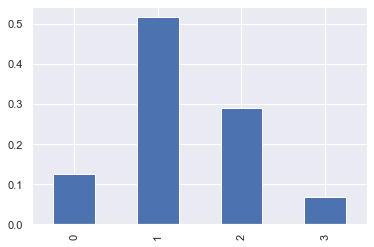

------------------ Level2 ------------------
Number of instances : 35, Number of features : 83
Class distribution


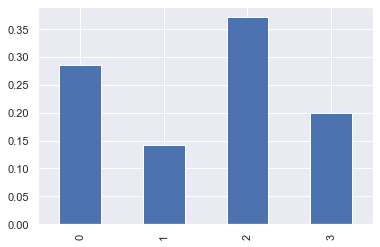

------------------ Level3 ------------------
Number of instances : 408, Number of features : 83
Class distribution


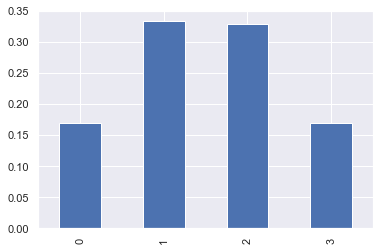

------------------ Level4 ------------------
Number of instances : 338, Number of features : 83
Class distribution


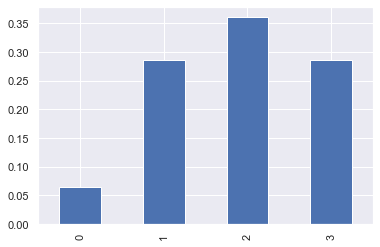

------------------ Level5 ------------------
Number of instances : 164, Number of features : 83
Class distribution


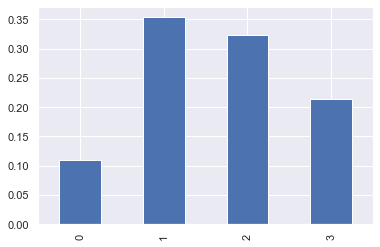

------------------ Level6 ------------------
Number of instances : 67, Number of features : 83
Class distribution


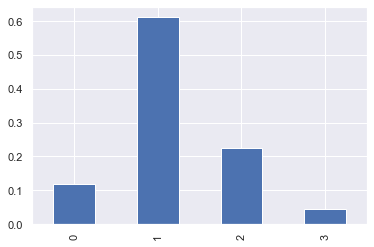

------------------ Level7 ------------------
Number of instances : 19, Number of features : 83
Class distribution


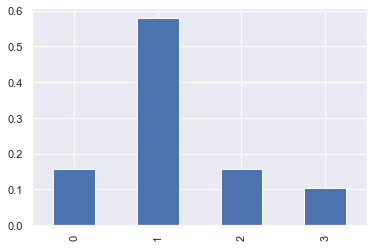

------------------ Level8 ------------------
Number of instances : 6, Number of features : 83
Class distribution


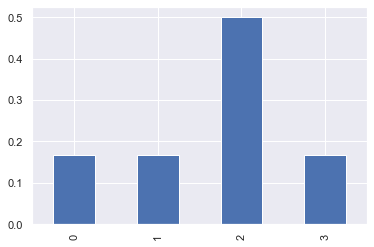

In [81]:
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    print(f"Number of instances : {level_processed_dataframe.shape[0]}, Number of features : {level_processed_dataframe.shape[1]-1}")
    print("Class distribution")
    counts = level_processed_dataframe[LABELS_KEY].value_counts(normalize=True).sort_index()
    counts.plot(kind='bar')
    plt.show()

### 5.4 Delete level 2, level 7 and 8 data (not enough data)

In [82]:
del levels_processed_dataframes[LEVEL_2]
del levels_processed_dataframes[LEVEL_6]
del levels_processed_dataframes[LEVEL_7]
del levels_processed_dataframes[LEVEL_8]

### 5.5 Data analysis

In [83]:
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    # Drop irrelevant feature (same values) for analysis
    unused_features = []
    for key in level_processed_dataframe.columns:
        nb_values = level_processed_dataframe[key].value_counts()
        if len(nb_values) == 1: # If all the values are the same
            unused_features.append(key)
    print("Relevant features: ",len(level_processed_dataframe.columns)-len(unused_features))
    # level_processed_dataframe.to_excel("data/df_"+level_key+".xlsx")
    relevant_level_processed_dataframe = level_processed_dataframe.drop(columns=unused_features)
    print("Histograms: ")
    # relevant_level_processed_dataframe.hist(bins = 30, figsize =(30,25))
    # plt.show()
    print("Correlation: ")
    # corr_matrix = relevant_level_processed_dataframe.corr()
    # plt.figure(figsize = (30,25))
    # ax = sns.heatmap(corr_matrix, annot=True)
    # plt.show()

------------------ Level1 ------------------
Relevant features:  55
Histograms: 
Correlation: 
------------------ Level3 ------------------
Relevant features:  62
Histograms: 
Correlation: 
------------------ Level4 ------------------
Relevant features:  68
Histograms: 
Correlation: 
------------------ Level5 ------------------
Relevant features:  65
Histograms: 
Correlation: 


### 5.6 Delete outliers

In [84]:
# Delete rows with too many executions (indicates a notion avoidance strategy :
# user playing with random)
MAX_EXECUTION_THRESHOLD = 40
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    nb_rows_before = level_processed_dataframe.shape[0]
    level_processed_dataframe = level_processed_dataframe.drop(level_processed_dataframe[level_processed_dataframe[NB_USER_STOPPED_EXECUTION_KEY] > MAX_EXECUTION_THRESHOLD].index)
    level_processed_dataframe = level_processed_dataframe.drop(level_processed_dataframe[level_processed_dataframe[NB_COMPLETED_EXECUTION_KEY] > MAX_EXECUTION_THRESHOLD].index)
    nb_rows_after = level_processed_dataframe.shape[0]
    print("Nb deleted rows: ",(nb_rows_before-nb_rows_after))


------------------ Level1 ------------------
Nb deleted rows:  0
------------------ Level3 ------------------
Nb deleted rows:  0
------------------ Level4 ------------------
Nb deleted rows:  3
------------------ Level5 ------------------
Nb deleted rows:  9


## 6) Data preparation

### 6.1 Create a test set over groups (25%)

------------------ Level1 ------------------
Train set size:  130
Train set label ratio: 


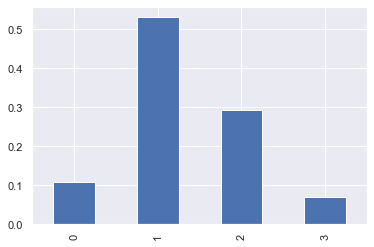

Test set size:  46
Test set label ratio: 


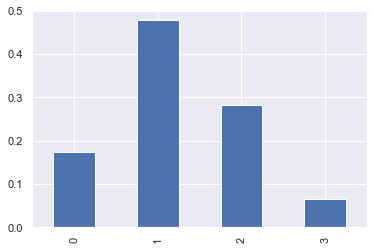

------------------ Level3 ------------------
Train set size:  302
Train set label ratio: 


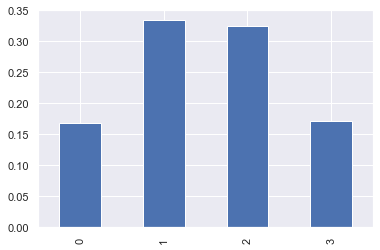

Test set size:  106
Test set label ratio: 


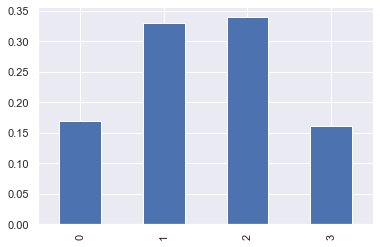

------------------ Level4 ------------------
Train set size:  247
Train set label ratio: 


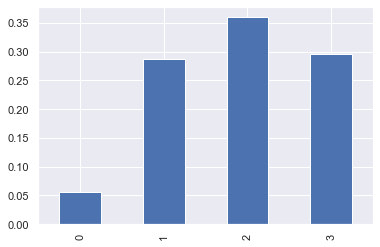

Test set size:  91
Test set label ratio: 


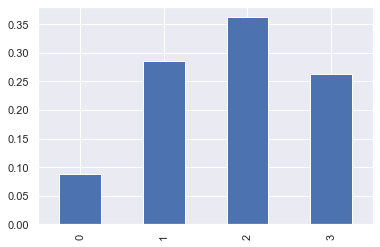

------------------ Level5 ------------------
Train set size:  130
Train set label ratio: 


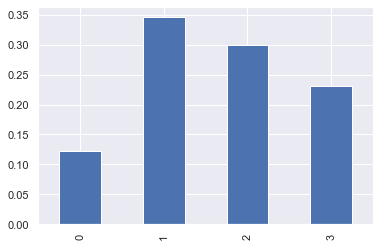

Test set size:  34
Test set label ratio: 


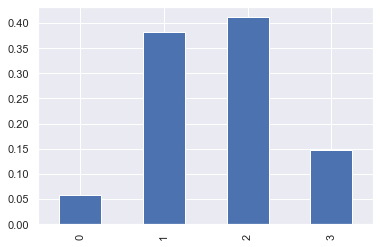

In [85]:
levels_train_sets = {}
levels_test_sets = {}
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    # Detour of StratifiedGroupKFold to get stratified AND group aware train-test split
    test_set_ratio = 0.25
    cv = StratifiedGroupKFold(n_splits=int(1/test_set_ratio),shuffle=True, random_state = 42)
    split_results = cv.split(level_processed_dataframe,y=level_processed_dataframe[LABELS_KEY], groups=level_processed_dataframe[GROUP_KEY])
    (level_train_set_index, level_test_set_index) = next(split_results)
    
    # level_train_set_index, level_test_set_index = next(GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42).split(level_processed_dataframe, groups=level_processed_dataframe[GROUP_KEY]))

    level_train_set = level_processed_dataframe.iloc[level_train_set_index]
    level_test_set = level_processed_dataframe.iloc[level_test_set_index]
    
    #  Display class distribution
    print("Train set size: ",len(level_train_set))
    print("Train set label ratio: ")
    train_counts = level_train_set[LABELS_KEY].value_counts(normalize=True).sort_index()
    train_counts.plot(kind='bar')
    plt.show()
    print("Test set size: ",len(level_test_set))
    print("Test set label ratio: ")
    test_counts = level_test_set[LABELS_KEY].value_counts(normalize=True).sort_index()
    test_counts.plot(kind='bar')
    plt.show()
    levels_train_sets[level_key]= level_train_set
    levels_test_sets[level_key]= level_test_set

### 6.2 Split features, labels and groups

In [86]:
def feature_label_group_split(dataset):
    dataset_features = dataset.drop(columns=[LABELS_KEY,GROUP_KEY])
    dataset_labels = dataset[LABELS_KEY].copy()
    dataset_groups = dataset[GROUP_KEY].copy()
    return (dataset_features, dataset_labels,dataset_groups)

def feature_label_split(dataset):
    dataset_features = dataset.drop(columns=[LABELS_KEY,GROUP_KEY])
    dataset_labels = dataset[LABELS_KEY].copy()
    return (dataset_features, dataset_labels)



### 6.3 Delete Irrelevant features

In [87]:
# Create a custom transformer to delete irrelevant features (all values are the same)
class DeleteIrrelevantFeatures(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or ** kargs
        pass
    def fit(self, X, y = None):
        self.unused_features = []
        for key in X.columns:
        # E_CONTAMINATION
            nb_values = X[key].value_counts()
            if len(nb_values) == 1: # If all the values are the same
                # print("Deleted feature :",key)
                self.unused_features.append(key)
        # print("Remain features: ",len(X.columns)-len(self.unused_features))
        return self
    def transform(self, X, y = None):
        # print("Number of deleted features",len(self.unused_features))
        modified_X = X.drop(columns=self.unused_features)    
        return modified_X


### 6.4 Discretize time feature (used for Naive Bayes Classifier)

In [88]:
# Create a custom transformer to discretize time features
class TimeSpendDiscretizer(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or ** kargs
        pass
    def fit(self, X, y = None):
        self.discretizer = {}
        for time_feature in TIME_FEATURES:
            self.discretizer[time_feature] = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
            self.discretizer[time_feature].fit(X[[time_feature]])
        return self
    def transform(self, X, y = None):
        modified_X = X.copy()
        for time_feature in TIME_FEATURES:
            modified_X[time_feature] = self.discretizer[time_feature].transform(modified_X[[time_feature]])
        return modified_X


### 6.5 Data Min-max scaling (used for SVM classifier)

In [89]:
data_scaler = MinMaxScaler()

### 6.6 SMOTE Oversampler (due to imbalanced data set)

In [90]:
oversampler = SMOTE(random_state=42)

## 7) Select a model

### 7.1 Model evaluation function (Stratified over groups K-Fold cross validation + F1 score)

In [91]:
def evaluate_model(pipeline,train_features,train_labels, train_groups):
    stratified_group_cross_val = StratifiedGroupKFold(n_splits=4,shuffle = True, random_state = 42)
    precision = cross_val_score(pipeline,train_features,train_labels,cv=stratified_group_cross_val, scoring ="precision_weighted", groups=train_groups)
    recall = cross_val_score(pipeline,train_features,train_labels,cv=stratified_group_cross_val, scoring ="recall_weighted",groups=train_groups)
    f1_score = cross_val_score(pipeline,train_features,train_labels,cv=stratified_group_cross_val, scoring ="f1_weighted", groups=train_groups)
    return precision, recall, f1_score


### 7.2 Dummy Classifiers

In [92]:
features_deleter = DeleteIrrelevantFeatures()
data_scaler = MinMaxScaler()

dummy_random_clf_pipe = Pipeline([
    ("feature_deleter", features_deleter),
    ("data_scaler", data_scaler),
    ("dummy_random_clf", DummyClassifier(strategy="uniform"))
])

### 7.3 Naive Bayes classifier (multinomial)

In [93]:
time_spend_discretizer = TimeSpendDiscretizer()
features_deleter = DeleteIrrelevantFeatures()
data_scaler = MinMaxScaler()

naive_bayes_clf_pipe = Pipeline([
    ("time_spend_discretizer",time_spend_discretizer),
    ("feature_deleter",features_deleter),
    ("data_scaler", data_scaler),
    ("naive_bayes_clf", MultinomialNB())
])

### 7.4 Logistic regression classifier

In [94]:
features_deleter = DeleteIrrelevantFeatures()
data_scaler = MinMaxScaler()

logistic_regression_clf_pipe = Pipeline([
    ("feature_deleter",features_deleter),
    ("data_scaler", data_scaler),
    ("logistic_regression_clf", LogisticRegression(random_state=42))
])

### 7.5 SVM Classifier

In [95]:
features_deleter = DeleteIrrelevantFeatures()
data_scaler = MinMaxScaler()

svm_clf_pipe = Pipeline([
    ("feature_deleter",features_deleter),
    ("data_scaler", data_scaler),
    ("svm_gaussian_clf", SVC(kernel="rbf"))
])

### 7.6 Decision Tree / Random Forest Classifier

In [96]:
features_deleter = DeleteIrrelevantFeatures()
data_scaler = MinMaxScaler()

decision_tree_clf_pipe = Pipeline([
    ("feature_deleter",features_deleter),
    ("data_scaler", data_scaler),
    ("decision_tree_clf", DecisionTreeClassifier(random_state = 42))
])

random_forest_clf_pipe = Pipeline([
    ("feature_deleter",features_deleter),
    ("data_scaler", data_scaler),
    ("random_forest", RandomForestClassifier(random_state = 42))
])

### 7.7 Models evaluation


In [97]:
classifiers = {
    "Dummy random": dummy_random_clf_pipe,
    "Naive Bayes": naive_bayes_clf_pipe,
    "Logistic regression":logistic_regression_clf_pipe,
    "SVM": svm_clf_pipe,
    "Decision Tree":decision_tree_clf_pipe,
    "Random Forest": random_forest_clf_pipe
}
levels_results = {}
for level_key, level_train_set in levels_train_sets.items():
    print(f"------------------ {level_key} ------------------")
    level_results = []
    level_train_set_features, level_train_set_labels, level_train_set_groups  = feature_label_group_split(level_train_set)
    for classifier_name, classifier in classifiers.items():
        csf_precision, csf_recall, csf_f1_score = evaluate_model(classifier, level_train_set_features, level_train_set_labels, level_train_set_groups)
        level_results.append({
            "Precision_m":csf_precision.mean(),
            "Precision_std":csf_precision.std(),
            "Recall_m":csf_recall.mean(),
            "Recall_std":csf_recall.std(),
            "F1_score_m":csf_f1_score.mean(),
            "F1_score_std":csf_f1_score.std(),
        })
    level_results_dataframe = pd.DataFrame(level_results,index=classifiers.keys())
    levels_results[level_key] = level_results_dataframe
    print("Done")

------------------ Level1 ------------------


c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\

Done
------------------ Level3 ------------------
Done
------------------ Level4 ------------------


c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Done
------------------ Level5 ------------------


c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Branthôme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Done


### 7.7 Results displaying

------------------ Level1 ------------------
Best classifier : Decision Tree, F1_score : 0.7054571039613847
------------------ Level3 ------------------
Best classifier : Logistic regression, F1_score : 0.6990816410750811
------------------ Level4 ------------------
Best classifier : Random Forest, F1_score : 0.7198783945692279
------------------ Level5 ------------------
Best classifier : Random Forest, F1_score : 0.5725167118690755


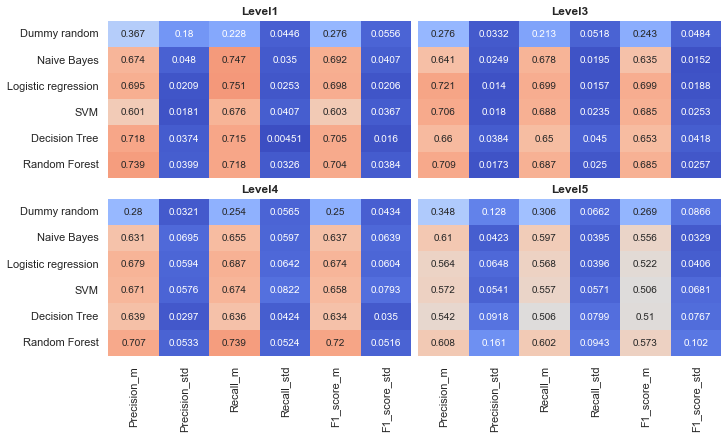

In [98]:
levels_best_classifier_score = {}

fig, axs = plt.subplots(2,2, constrained_layout=True,figsize=[10,6])
index = 0

for level_key, level_results in levels_results.items():
    print(f"------------------ {level_key} ------------------")
    col = index % 2
    row = index // 2
    cbar = False
    if col == 2:
        cbar= True
    sns.heatmap(level_results, ax = axs[row,col], vmin=0, vmax=1,cmap="coolwarm", annot=True,fmt=".3g", cbar=cbar)
    axs[row,col].set_title(level_key,fontweight='bold')
    if row == 0 :
        axs[row,col].get_xaxis().set_visible(False)
    if col !=0 :
        axs[row,col].get_yaxis().set_visible(False)
    
    best_classifier = level_results.sort_values(by=["F1_score_m"], ascending=False).iloc[0]
    levels_best_classifier_score[level_key] = best_classifier[4]
    print(f"Best classifier : {best_classifier.name}, F1_score : {best_classifier[4]}")
    index += 1
plt.savefig("exportedFigures/modelsScores.png",dpi=300)


## 8) Fine tune selected model (Random Forest)

### 8.1 Grid search (n_estimators, max_depth)

In [99]:

levels_best_classifiers = {}
features_deleter = DeleteIrrelevantFeatures()
data_scaler = MinMaxScaler()

random_forest_clf_pipe = Pipeline([
    ("feature_deleter",features_deleter),
    ("data_scaler", data_scaler),
    ("random_forest_clf", RandomForestClassifier(random_state = 42))
])

stratified_group_cross_val = StratifiedGroupKFold(n_splits=4,shuffle = True, random_state = 42)

param_grid = [{
    # Default : 100
    # "random_forest_clf__n_estimators": [10, 50, 100, 150, 200, 250, 300],
    "random_forest_clf__n_estimators": [50,150],
    # Default = None
    # "random_forest_clf__max_depth" :
    # [5,10,15,20,25,30,35,40,45,50,55,60,None],
    "random_forest_clf__max_depth" : [10,15],
}]

grid_search = GridSearchCV( 
    estimator = random_forest_clf_pipe,
    param_grid= param_grid,
    cv = stratified_group_cross_val,
    verbose = 1,
    scoring ='f1_weighted',
    n_jobs=-1)

for level_key, level_train_set in levels_train_sets.items():
    print(f"------------------ {level_key} ------------------")
    level_train_set_features, level_train_set_labels, level_train_set_groups = feature_label_group_split(level_train_set)
    grid_search.fit(level_train_set_features,y=level_train_set_labels, groups=level_train_set_groups)
    print(f"Best score: {grid_search.best_score_}, Untuned Score: {levels_best_classifier_score[level_key]}, Delta: {grid_search.best_score_-levels_best_classifier_score[level_key]}")
    print("Best params: ",grid_search.best_params_)
    levels_best_classifiers[level_key] = deepcopy(grid_search.best_estimator_)


------------------ Level1 ------------------
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best score: 0.7234211265524758, Untuned Score: 0.7054571039613847, Delta: 0.01796402259109109
Best params:  {'random_forest_clf__max_depth': 15, 'random_forest_clf__n_estimators': 50}
------------------ Level3 ------------------
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best score: 0.710698756016401, Untuned Score: 0.6990816410750811, Delta: 0.011617114941319895
Best params:  {'random_forest_clf__max_depth': 10, 'random_forest_clf__n_estimators': 150}
------------------ Level4 ------------------
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best score: 0.7363861588043878, Untuned Score: 0.7198783945692279, Delta: 0.016507764235159983
Best params:  {'random_forest_clf__max_depth': 10, 'random_forest_clf__n_estimators': 50}
------------------ Level5 ------------------
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best score: 0.576972743007

## 9) Try best model on test set

### 9.1 Predictions

In [100]:

levels_test_set_results = []
levels_test_set_labels = {}
levels_test_set_predictions = {}
levels_test_set_scores = {}
for level_key, level_test_set in levels_test_sets.items():
    print(f"------------------ {level_key} ------------------")
    level_best_classifier = levels_best_classifiers[level_key]
    level_test_set_features, level_test_set_labels = feature_label_split(level_test_set)
    levels_test_set_labels[level_key] = level_test_set_labels
    level_test_prediction = level_best_classifier.predict(level_test_set_features)
    levels_test_set_predictions[level_key] = level_test_prediction
    level_precision_score = precision_score(level_test_set_labels, level_test_prediction, average='weighted')
    level_recall_score = recall_score(level_test_set_labels, level_test_prediction, average='weighted')
    level_f1_score = f1_score(level_test_set_labels, level_test_prediction, average='weighted')
    levels_test_set_scores[level_key] = [[level_precision_score, level_recall_score, level_f1_score]]
    levels_test_set_results.append({"Precision":level_precision_score,"Recall":level_recall_score,"F1_score":level_f1_score})
    print("Done")

    # ----- Extract a positive and negative instance for webservice testing purpose ----- 
    # json_positive_instance = level_test_set[level_test_set[LABELS_KEY]==1].iloc[0].drop(labels=[LABELS_KEY]).to_json()
    # print("json_positive_instance: ",json_positive_instance)
    # json_negative_instance = level_test_set[level_test_set[LABELS_KEY]==0].iloc[0].drop(labels=[LABELS_KEY]).to_json()
    # print("json_negative_instance: ",json_negative_instance)
    # -----------------------------------------------------------------------------------

levels_test_set_results_dataframe = pd.DataFrame(levels_test_set_results,index=levels_test_sets.keys())

------------------ Level1 ------------------
Done
------------------ Level3 ------------------
Done
------------------ Level4 ------------------
Done
------------------ Level5 ------------------
Done


### 9.2 Results displaying

------------------ Level1 ------------------
------------------ Level3 ------------------
------------------ Level4 ------------------
------------------ Level5 ------------------


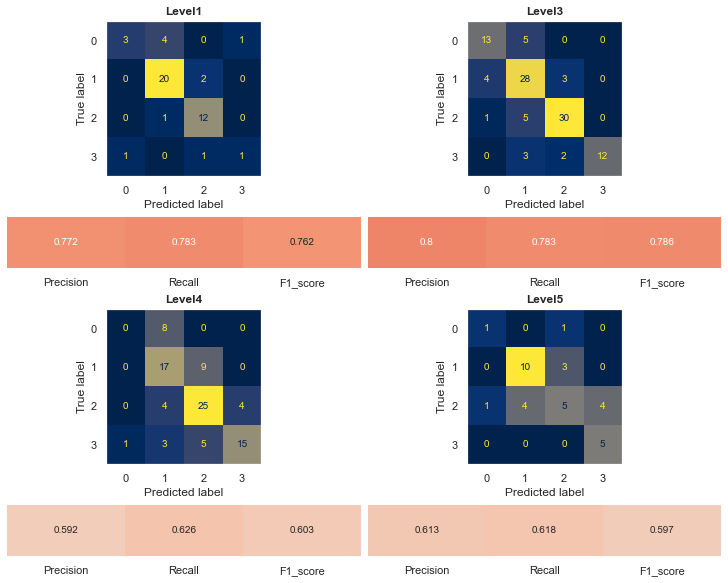

In [101]:
fig, axs = plt.subplots(4,2, constrained_layout=True,figsize=[10,8],gridspec_kw={'height_ratios': [3,1,3,1]})
index = 0

for level_key, level_test_set_scores in levels_test_set_scores.items():
    print(f"------------------ {level_key} ------------------")
    col = index % 2
    row = index // 2
    level_test_set_labels = levels_test_set_labels[level_key]
    level_test_set_predictions = levels_test_set_predictions[level_key]
    ConfusionMatrixDisplay.from_predictions(level_test_set_labels, level_test_set_predictions, ax = axs[2*row,col], colorbar = False, cmap="cividis")
    axs[2*row,col].grid(False)
    axs[2*row,col].set_title(level_key,fontweight='bold')
    sns.heatmap(level_test_set_scores, yticklabels= [""], xticklabels= ["Precision","Recall","F1_score"], vmin=0, vmax=1,cmap="coolwarm", annot=True,fmt=".3g", cbar=False, ax=axs[2*row+1,col])
    index +=1
plt.savefig("exportedFigures/testSetScores.png",dpi=300)


## 10) Features importances

### 10.1 MDI Importance (Mean Decrease in Impurity)

Random Forest impurity-based feature importances. Impurity is quantified by the splitting criterion of the decision trees (Gini, Entropy or Mean Squared Error): https://scikit-learn.org/stable/modules/ensemble.html#random-forest-feature-importance

/!\ Impurity-based feature importance for trees are strongly biased and favor high cardinality features (typically numerical features) over low cardinality features such as binary features or categorical variables with a small number of possible categories.

------------------ Level1 ------------------
52
------------------ Level3 ------------------
59
------------------ Level4 ------------------
65
------------------ Level5 ------------------
63


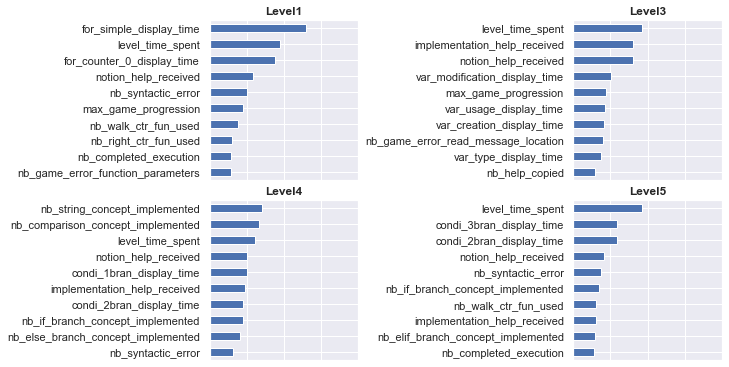

In [104]:
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=[10,5])
index = 0
for level_key, level_best_classifier in levels_best_classifiers.items():
    print(f"------------------ {level_key} ------------------")
    print(level_best_classifier["random_forest_clf"].n_features_in_)
    level_features_importances = level_best_classifier["random_forest_clf"].feature_importances_
    level_features = level_best_classifier["data_scaler"].feature_names_in_
    level_features_importances_series = pd.Series(level_features_importances, index=level_features)
    level_features_importances_series = level_features_importances_series.sort_values(ascending=False)  
    level_features_importances_series = level_features_importances_series.head(10)
    
    col = index % 2
    row = index // 2
    level_features_importances_series.plot.barh(ax = axs[row,col])
    axs[row,col].invert_yaxis()
    axs[row,col].set_xlim([0, 0.2])
    axs[row,col].set_xticks([0,0.05,0.1,0.15,0.2])
    if row != 2:
        axs[row,col].set_xticklabels(["","","","",""])
    axs[row,col].set_title(level_key, fontweight='bold')
    index += 1

plt.savefig("exportedFigures/featuresMDIImportances.png",dpi=300)


### 10.2 Permutation importance

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled : https://scikit-learn.org/stable/modules/permutation_importance.html

/!\ When two features are correlated and one of the features is permuted, the model will still have access to the feature through its correlated feature. This will result in a lower importance value for both features, where they might actually be important.

------------------ Level1 ------------------
------------------ Level3 ------------------
------------------ Level4 ------------------
------------------ Level5 ------------------


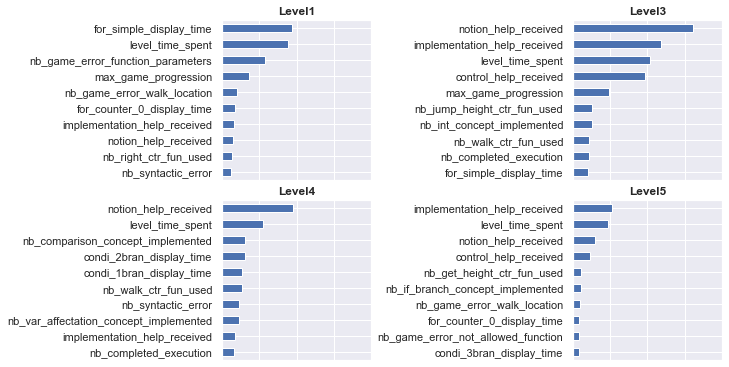

In [ ]:
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=[10,5])
index = 0
for level_key, level_best_classifier in levels_best_classifiers.items():
    print(f"------------------ {level_key} ------------------")
    level_train_set_features, level_train_set_labels, level_train_set_groups = feature_label_group_split(levels_train_sets[level_key])
    level_permutation_importance = permutation_importance(level_best_classifier, level_train_set_features, level_train_set_labels,scoring="f1_weighted", n_repeats=10,random_state=42, n_jobs=-1)
    level_features_importances = level_permutation_importance.importances_mean
    level_features_importances_series = pd.Series(level_features_importances, index=level_train_set_features.keys())
    level_features_importances_series = level_features_importances_series.sort_values(ascending=False)  
    level_features_importances_series = level_features_importances_series.head(10)
    
    col = index % 2
    row = index // 2
    
    level_features_importances_series.plot.barh(ax = axs[row,col])
    axs[row,col].invert_yaxis()
    axs[row,col].set_xlim([0, 0.1])
    axs[row,col].set_xticks([0,0.025,0.05,0.075,0.1])
    if row != 2:
        axs[row,col].set_xticklabels(["","","","",""])
    axs[row,col].set_title(level_key, fontweight='bold')
    index += 1

plt.savefig("exportedFigures/featuresPermutationImportances.png",dpi=300)


    

# 11) Model exportation

In [ ]:
# for level_key, level_best_classifier in levels_best_classifiers.items():
#     print(f"------------------ {level_key} ------------------")
#     model_filename = f"exportedModels/{level_key.lower()}_model.joblib"
#     with open(model_filename,"wb") as f:
#         dump(level_best_classifier, f) 
#     print(f"Exportation of {model_filename} done")